# Below you will find step by step code. for output that displays three of my variables as frequency tables and analysis as per assignment requirements please scroll all the way down.

### Import necesary libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Read Dataset as Pandas 

In [2]:
df = pd.read_csv('gapminder.csv',low_memory = False)

### Since all variables are as objects, let's convert them into numeric for analysis
Error = 'coerce' will ensure to fill the blanks with "NaN

In [93]:
df['employrate'] = pd.to_numeric(df['employrate'],errors='coerce')
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'],errors='coerce')
df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'],errors='coerce')
df['polityscore'] = pd.to_numeric(df['polityscore'],errors='coerce')
df['internetuserate'] = pd.to_numeric(df['internetuserate'],errors='coerce')
df['relectricperperson'] = pd.to_numeric(df['relectricperperson'],errors='coerce')
df['alcconsumption'] = pd.to_numeric(df['alcconsumption'],errors='coerce')
df['breastcancerper100th'] = pd.to_numeric(df['breastcancerper100th'],errors='coerce')
df['lifeexpectancy'] = pd.to_numeric(df['lifeexpectancy'],errors='coerce')


### Remove NaN rows from data 
#### Since I want to analyze income per person it makes no sense to analyze countries without this value, I removed NaNs from the 3 Main variables as well.

In [4]:
df.dropna(subset = ["incomeperperson"], inplace=True)
df.dropna(subset = ["employrate"], inplace=True)
df.dropna(subset = ["femaleemployrate"], inplace=True)
df.dropna(subset = ["polityscore"], inplace=True)

In [5]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
1,Albania,1914.996551,7.29,1.0247361,57.4,223747333.333333,42.099998,,44.989947,76.918,,9.0,636.341383,7.69932985305786,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2932108666.66667,31.700001,.1,12.500073,73.131,.42009452521537,2.0,590.509814,4.8487696647644,50.500000,65.22
4,Angola,1381.004268,5.57,1.4613288,23.1,248358000,69.400002,2,9.999954,51.093,,-2.0,172.999227,14.5546770095825,75.699997,56.7
6,Argentina,10749.419238,9.35,.560987,73.9,5872119000,45.900002,.5,36.000335,75.901,.635943800978195,8.0,768.428300,7.765584,58.400002,92
7,Armenia,1326.741757,13.66,2.6184384,51.6,51219666.6666667,34.200001,.1,44.001025,74.241,,5.0,603.763058,3.74158787727356,40.099998,63.86


In [6]:
df.describe()

,incomeperperson,alcconsumption,femaleemployrate,internetuserate,polityscore,relectricperperson,employrate
count,152.000000,152.000000,152.000000,150.000000,152.000000,123.000000,152.000000
mean,6706.556978,6.811184,48.068421,32.659142,3.861842,1109.577034,59.212500
std,9823.592315,5.104260,14.826857,27.688447,6.245581,1611.412875,10.363802
min,103.775857,0.050000,12.400000,0.210066,-10.000000,0.000000,34.900002
25%,560.797158,2.550000,39.549999,8.529589,-2.000000,211.078065,51.924999
50%,2225.931019,6.000000,48.549999,26.608624,7.000000,537.104738,58.900002
75%,6905.287662,10.012500,56.050000,51.755758,9.000000,1425.005472,65.000000
max,39972.352768,23.010000,83.300003,93.277508,10.000000,11154.755033,83.199997


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 212
Data columns (total 16 columns):
country                 152 non-null object
incomeperperson         152 non-null float64
alcconsumption          152 non-null float64
armedforcesrate         152 non-null object
breastcancerper100th    152 non-null object
co2emissions            152 non-null object
femaleemployrate        152 non-null float64
hivrate                 152 non-null object
internetuserate         150 non-null float64
lifeexpectancy          152 non-null object
oilperperson            152 non-null object
polityscore             152 non-null float64
relectricperperson      123 non-null float64
suicideper100th         152 non-null object
employrate              152 non-null float64
urbanrate               152 non-null object
dtypes: float64(7), object(9)
memory usage: 20.2+ KB


In [8]:
print(len(df))

152


In [9]:
print(len(df.columns))

16


# frequency counts & Anaysis as per assignment. 

### Since it would not make sense to do a frequency count on the gapminder data alone, we need to categorize our variables in order to count percentage and count amount from a range of data. I did this with the function pd.qcut( ) which distributes dividing my data from the lower to the highest in 10 portions. 

#### Income per person 

In [10]:
icplabels = ['Extremely Poor','Very Poor', 'Middle Poor', 'Poor', 'Middle', 'middle rich', 'Rich', 
             'Very Rich', 'Extremely Rich','Richest']
df['income_class'] = pd.qcut(df['incomeperperson'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=icplabels)

In [11]:
print("counts for income per person on each income class")
c1 = df["income_class"].value_counts(sort = False) # For counts
print(c1)



counts for income per person on each income class
Extremely Poor    16
Very Poor         15
Middle Poor       15
Poor              15
Middle            15
middle rich       15
Rich              15
Very Rich         15
Extremely Rich    15
Richest           16
Name: income_class, dtype: int64


In [12]:
print("2010 percentage for income per person class")
p1 = df["income_class"].value_counts(sort = False, normalize = True) # for percentages 
print(p1 * 100)

2010 percentage for income per person class
Extremely Poor    10.526316
Very Poor          9.868421
Middle Poor        9.868421
Poor               9.868421
Middle             9.868421
middle rich        9.868421
Rich               9.868421
Very Rich          9.868421
Extremely Rich     9.868421
Richest           10.526316
Name: income_class, dtype: float64


#### We can see the data distributed in 10 equal bins, now if we want to see who are the richest or poorer countries we can subset again and show as below, we use sort_values( ) to sort in ascending order. 

In [13]:
print('2010 Richest Countries in Gross Domestic Product per capita in constant 2000 US$.')
Richest_C = df.loc[df.income_class == 'Richest',['country','incomeperperson']]
Richest_C.sort_values(by=['incomeperperson'])

2010 Richest Countries in Gross Domestic Product per capita in constant 2000 US$.


,country,incomeperperson
9,Australia,25249.986061
69,Germany,25306.187193
32,Canada,25575.352623
136,Netherlands,26551.844238
10,Austria,26692.984107
63,Finland,27110.731591
90,Ireland,27595.091347
202,United Kingdom,28033.489283
50,Denmark,30532.277044
184,Sweden,32292.482984


In [14]:
print('2010 Extremely Poor Countries in Gross Domestic Product per capita in constant 2000 US$.')
Poorer_C = df.loc[df.income_class == 'Extremely Poor',['country','incomeperperson']]
Poorer_C.sort_values(by=['incomeperperson'])

2010 Extremely Poor Countries in Gross Domestic Product per capita in constant 2000 US$.


,country,incomeperperson
41,"Congo, Dem. Rep.",103.775857
29,Burundi,115.305996
58,Eritrea,131.796207
107,Liberia,155.033231
79,Guinea-Bissau,161.317137
141,Niger,180.083376
115,Malawi,184.141797
60,Ethiopia,220.891248
35,Central African Rep.,239.518749
114,Madagascar,242.677534


#### Exployment rate 

In [15]:
eprlabels = ['Extremely Unemployed','Very Unemployed', 'Middle Unemployed', 'Unemployed', 'Middle', 'middle Employed', 'High Employed', 
             'Very High Employed', 'Extremely Employed','Most Employed']
df['employment_class'] = pd.qcut(df['employrate'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=eprlabels)

print("2007 counts for Employment Rate class ")
c2 = df["employment_class"].value_counts(sort = False) # For counts
print(c2)



2007 counts for Employment Rate class 
Extremely Unemployed    16
Very Unemployed         16
Middle Unemployed       14
Unemployed              15
Middle                  17
middle Employed         13
High Employed           15
Very High Employed      15
Extremely Employed      15
Most Employed           16
Name: employment_class, dtype: int64


In [16]:
print("2007 percentage for Employment Rate")
p2 = df["employment_class"].value_counts(sort = False, normalize = True) # for percentages 
print(p2 * 100 )

2007 percentage for Employment Rate
Extremely Unemployed    10.526316
Very Unemployed         10.526316
Middle Unemployed        9.210526
Unemployed               9.868421
Middle                  11.184211
middle Employed          8.552632
High Employed            9.868421
Very High Employed       9.868421
Extremely Employed       9.868421
Most Employed           10.526316
Name: employment_class, dtype: float64


In [17]:
print('2007 Most employed countries employees age 15+ (% of population)')
Most_Employed = df.loc[df.employment_class == 'Most Employed',['country','employrate']]
Most_Employed.sort_values(by=['employrate'])

2007 Most employed countries employees age 15+ (% of population)


,country,employrate
150,Paraguay,73.099998
97,Kenya,73.199997
201,United Arab Emirates,75.199997
4,Angola,75.699997
156,Qatar,76.000000
131,Mozambique,77.000000
103,Laos,78.199997
189,Tanzania,78.199997
30,Cambodia,78.900002
160,Rwanda,79.800003


In [18]:
print('2007 Least employed countries employees age 15+ (% of population)')
Least_Employed = df.loc[df.employment_class == 'Extremely Unemployed',['country','employrate']]
Least_Employed.sort_values(by=['employrate'])

2007 Least employed countries employees age 15+ (% of population)


,country,employrate
113,"Macedonia, FYR",34.900002
89,Iraq,37.400002
95,Jordan,38.900002
210,"Yemen, Rep.",39.000000
7,Armenia,40.099998
178,South Africa,41.099998
195,Tunisia,41.599998
133,Namibia,42.000000
55,Egypt,42.400002
196,Turkey,42.799999


#### Female employment rate

In [19]:


feprlabels = ['Extremely Low Females Employed','Very Low Females Employed', 'low females Employed',
              'Midle low females Employed', 'Middle Females Employed ', 'Middle High Females Employed', 
              'High Females Employed', 'Very High females Employed', 'Extremely High Females Employed',
              'Most Employed Females']

df['Female_employment_class'] = pd.qcut(df['femaleemployrate'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=feprlabels)

print("2007 counts for Female Employment Rate Rate")
c3 = df["Female_employment_class"].value_counts(sort = False) # For counts
print(c3)

2007 counts for Female Employment Rate Rate
Extremely Low Females Employed     16
Very Low Females Employed          16
low females Employed               15
Midle low females Employed         14
Middle Females Employed            15
Middle High Females Employed       15
High Females Employed              15
Very High females Employed         16
Extremely High Females Employed    14
Most Employed Females              16
Name: Female_employment_class, dtype: int64


In [20]:
print("2007 percentage for Female Employment Rate")
p3 = df["Female_employment_class"].value_counts(sort = False, normalize = True) # For percentages
print(p3 * 100)

2007 percentage for Female Employment Rate
Extremely Low Females Employed     10.526316
Very Low Females Employed          10.526316
low females Employed                9.868421
Midle low females Employed          9.210526
Middle Females Employed             9.868421
Middle High Females Employed        9.868421
High Females Employed               9.868421
Very High females Employed         10.526316
Extremely High Females Employed     9.210526
Most Employed Females              10.526316
Name: Female_employment_class, dtype: float64


In [21]:
print('2007 Most Female employed countries female employees age 15+ (% of population)')
Most_Employed_Females = df.loc[df.Female_employment_class == 'Most Employed Females',['country','femaleemployrate']]
Most_Employed_Females.sort_values(by=['femaleemployrate'])



2007 Most Female employed countries female employees age 15+ (% of population)


,country,femaleemployrate
208,Vietnam,67.599998
38,China,68.900002
149,Papua New Guinea,68.900002
115,Malawi,69.000000
4,Angola,69.400002
60,Ethiopia,73.000000
30,Cambodia,73.400002
28,Burkina Faso,75.800003
189,Tanzania,76.099998
78,Guinea,77.599998


In [22]:
print('2007 Least Female employed countries female employees age 15+ (% of population)')
Least_Employed_Females = df.loc[df.Female_employment_class == 'Extremely Low Females Employed',['country','femaleemployrate']]
Least_Employed_Females.sort_values(by=['femaleemployrate'])

2007 Least Female employed countries female employees age 15+ (% of population)


,country,femaleemployrate
89,Iraq,12.400000
95,Jordan,13.000000
186,Syria,16.700001
167,Saudi Arabia,17.700001
55,Egypt,18.200001
146,Pakistan,19.000000
210,"Yemen, Rep.",20.299999
195,Tunisia,21.400000
196,Turkey,21.900000
130,Morocco,22.200001


# Due to the nature of Gapminder dataset, it was necesary to divide data into equal segments in order to understand the nature of the variables. due to this the data is then segmented almost equaly. however with the above analysis it is then possible to understand which are the richest and poorer countries in terms of income per capita, as well as employment rate and female employment rate. with this preliminary analysis one can already find certain questions to analyse further such as why are the most employed countries not in the list of richest countries in terms of income per capita and so forth. 

In [23]:
df2 = df[['country','incomeperperson','employrate', 'femaleemployrate',
          'polityscore','internetuserate','alcconsumption','relectricperperson',
          'income_class', 'employment_class' , 'Female_employment_class']]

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 212
Data columns (total 11 columns):
country                    152 non-null object
incomeperperson            152 non-null float64
employrate                 152 non-null float64
femaleemployrate           152 non-null float64
polityscore                152 non-null float64
internetuserate            150 non-null float64
alcconsumption             152 non-null float64
relectricperperson         123 non-null float64
income_class               152 non-null category
employment_class           152 non-null category
Female_employment_class    152 non-null category
dtypes: category(3), float64(7), object(1)
memory usage: 12.3+ KB


In [25]:
df2.head()

,country,incomeperperson,employrate,femaleemployrate,polityscore,internetuserate,alcconsumption,relectricperperson,income_class,employment_class,Female_employment_class
1,Albania,1914.996551,51.400002,42.099998,9.0,44.989947,7.29,636.341383,Middle,Middle Unemployed,Midle low females Employed
2,Algeria,2231.993335,50.500000,31.700001,2.0,12.500073,0.69,590.509814,middle rich,Very Unemployed,Very Low Females Employed
4,Angola,1381.004268,75.699997,69.400002,-2.0,9.999954,5.57,172.999227,Middle,Most Employed,Most Employed Females
6,Argentina,10749.419238,58.400002,45.900002,8.0,36.000335,9.35,768.428300,Extremely Rich,Middle,Middle Females Employed
7,Armenia,1326.741757,40.099998,34.200001,5.0,44.001025,13.66,603.763058,Middle,Extremely Unemployed,Very Low Females Employed


# Final task 4th Week , Graphing Variables 

### Descriptive statistics 

In [97]:
df2.iloc[:,:].corr() 

,incomeperperson,employrate,femaleemployrate,polityscore,internetuserate,alcconsumption,relectricperperson
incomeperperson,1.000000,-0.040390,-0.017725,0.286833,0.814343,0.288665,0.696845
employrate,-0.040390,1.000000,0.856878,-0.132070,-0.228859,-0.118685,0.130502
femaleemployrate,-0.017725,0.856878,1.000000,0.067378,-0.136574,0.175521,-0.019845
polityscore,0.286833,-0.132070,0.067378,1.000000,0.363882,0.408420,0.001091
internetuserate,0.814343,-0.228859,-0.136574,0.363882,1.000000,0.540564,0.646907
alcconsumption,0.288665,-0.118685,0.175521,0.408420,0.540564,1.000000,0.091546
relectricperperson,0.696845,0.130502,-0.019845,0.001091,0.646907,0.091546,1.000000


## Univariate Histograms for quantitative data. 

### Income Per Person 

Text(0.5, 1.0, 'Income Per Capita Distribution Chart')

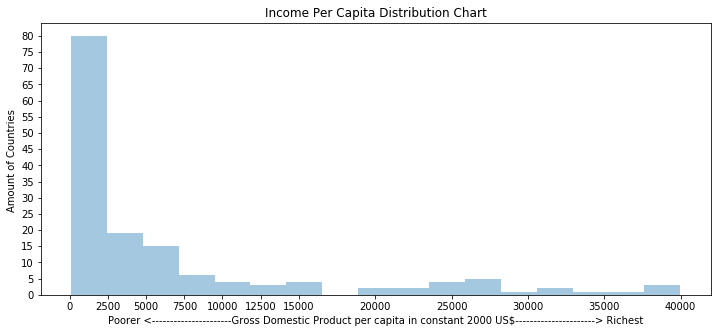

In [53]:
plt.figure(figsize=(12,5))
sns.distplot(df2['incomeperperson'], kde=False)
plt.xticks([0, 2500, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000, 35000, 40000 ,])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
plt.xlabel('Poorer <----------------------Gross Domestic Product per capita in constant 2000 US$----------------------> Richest')
plt.ylabel('Amount of Countries ')
plt.title('Income Per Capita Distribution Chart')

#### As Evidences in the above chart most of the world countries indeed fall into the low category from 0 to 2500 in constant 2000 US, the Histogram is thus skewed to the right.  

### Employment Rate 

Text(0.5, 1.0, 'Employment Rate Distribution Chart')

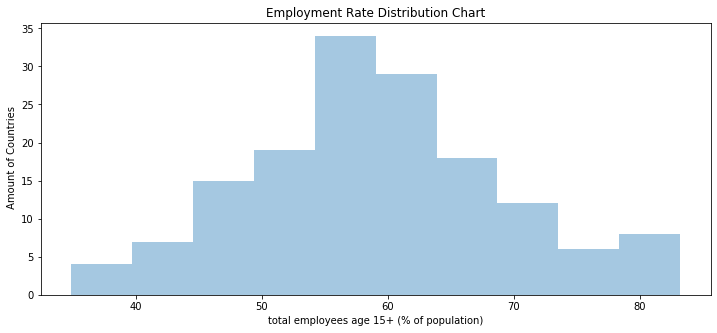

In [47]:
plt.figure(figsize=(12,5))
sns.distplot(df2['employrate'], kde=False)
plt.xlabel('total employees age 15+ (% of population)')
plt.ylabel(' Amount of Countries')
plt.title('Employment Rate Distribution Chart')

#### In this Histogram we see a very evenly distributed Histogram where most of the countries fall in the middle this an Unimodal distribution. 

### Female Employment Rate 

Text(0.5, 1.0, 'Female Employment Rate Distribution Chart')

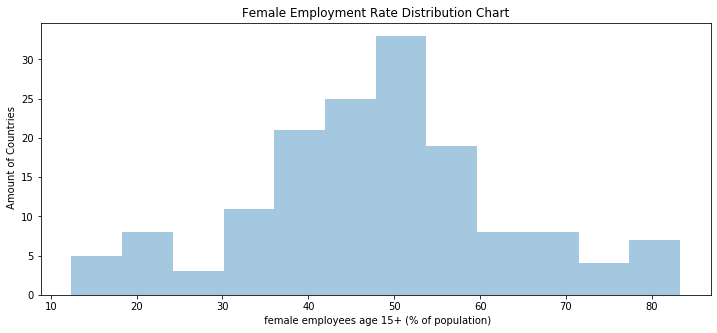

In [48]:
plt.figure(figsize=(12,5))
sns.distplot(df2['femaleemployrate'], kde=False)
plt.xlabel(' female employees age 15+ (% of population)')
plt.ylabel(' Amount of Countries')
plt.title('Female Employment Rate Distribution Chart')

#### In this Histogram we see a very evenly distributed Histogram where most of the countries fall in the middle. 

Text(0.5, 1.0, 'Internet User Rate Distribution Chart')

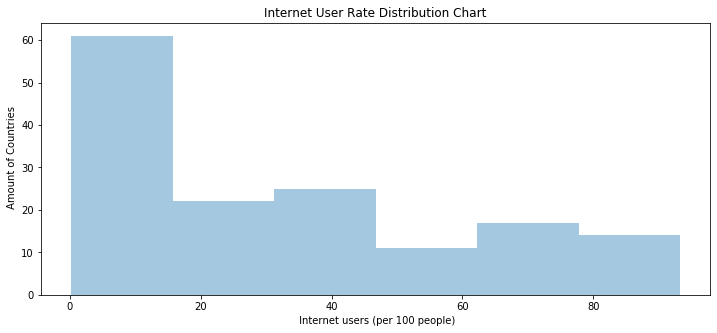

In [57]:
plt.figure(figsize=(12,5))
sns.distplot(df2['internetuserate'].dropna(), kde=False)
plt.xlabel(' Internet users (per 100 people)')
plt.ylabel(' Amount of Countries')
plt.title('Internet User Rate Distribution Chart')

#### As Expected in this chart we can see there is a high concentration of countries that have 0 to very low internet user rate, thus this is the reason why this variable correlates so strongly with income per person. the histogram illustrates this by being skewed to the right. 

Text(0.5, 1, 'Internet User Rate for Income Class')

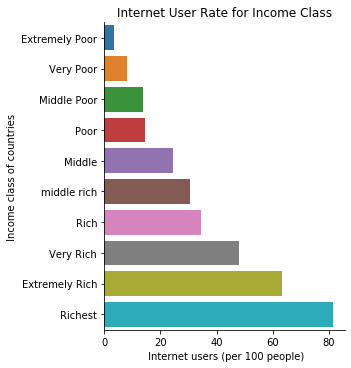

In [75]:
sns.catplot(x = 'internetuserate', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel(' Internet users (per 100 people)')
plt.ylabel(' Income class of countries ')
plt.title('Internet User Rate for Income Class')

#### Looking into INTERNET USER RATE and INCOME CLASS together  it is clear that the richest countries have higher internet rate. as illustrated by the figure above the richest countries have considerable more internet users per 100 people than even the extremely rich and a huge difference with the Extremely Poor countries. 

Text(0.5, 1, 'Employment Rate for Income Class')

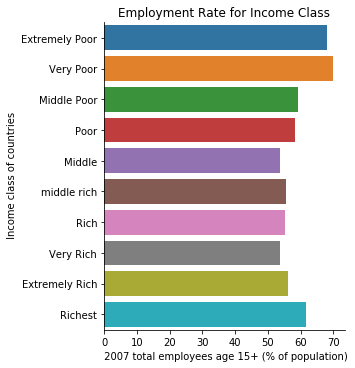

In [76]:
sns.catplot(x = 'employrate', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel(' 2007 total employees age 15+ (% of population)')
plt.ylabel(' Income class of countries')
plt.title('Employment Rate for Income Class')

Text(0.5, 1, 'Female Employment Rate for Income Class')

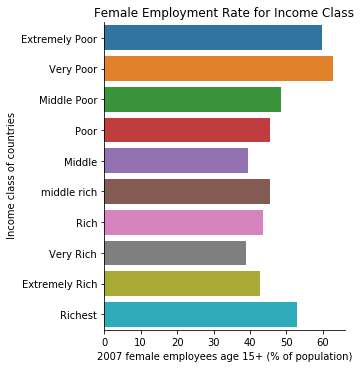

In [77]:
sns.catplot(x = 'femaleemployrate', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel('2007 female employees age 15+ (% of population)')
plt.ylabel(' Income class of countries')
plt.title('Female Employment Rate for Income Class')

#### Conversely we see a very even distribution between employment rate and female employment rate from the extremely poor to the richest countries thus showing very little effect on a country being richer per capita. 

Text(0.5, 1, 'Democracy Score for Income Class')

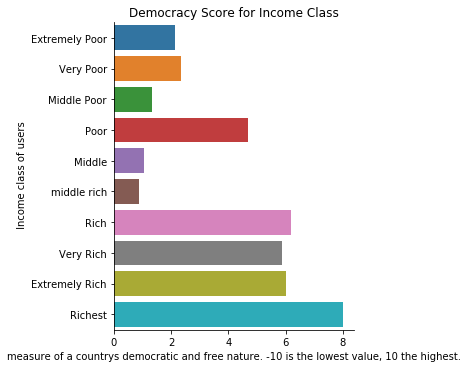

In [78]:
sns.catplot(x = 'polityscore', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel('measure of a countrys democratic and free nature. -10 is the lowest value, 10 the highest.')
plt.ylabel(' Income class of users')
plt.title('Democracy Score for Income Class')

#### While comparing the Democracy score we see that the richest countries also have the highest democatric and free nature of them all, however interestingly enough we see the "poor" countries have a considerably higher schore that "middle to middle rich" and "extremely poor" to "middle poor". 

Text(0.5, 1, 'Alcohol consumption for Income Class')

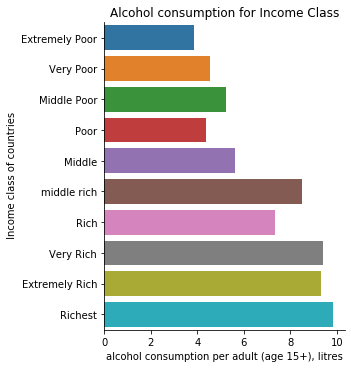

In [80]:
sns.catplot(x = 'alcconsumption', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel('alcohol consumption per adult (age 15+), litres')
plt.ylabel(' Income class of countries')
plt.title('Alcohol consumption for Income Class')

Text(0.5, 1, 'Electricity Consumption for Income Class')

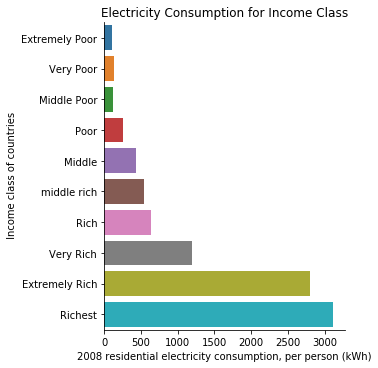

In [81]:
sns.catplot(x = 'relectricperperson', y = 'income_class',data = df2, kind = 'bar' , ci = None, )
plt.xlabel('2008 residential electricity consumption, per person (kWh)')
plt.ylabel(' Income class of countries')
plt.title('Electricity Consumption for Income Class')

#### We can also see a high electricity consumption for the richest and extremely rich contries as opposed to the poorest countries. 

Text(0.5, 1, 'Breast cancer rate per 100K females for Income Class')

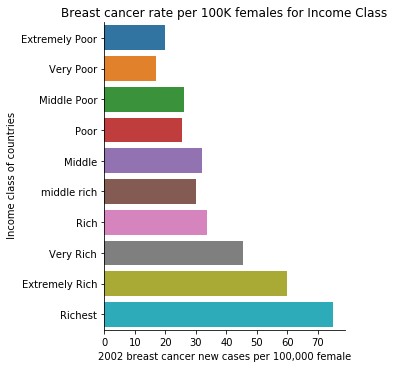

In [92]:
sns.catplot(x = 'breastcancerper100th', y = 'income_class',data = df, kind = 'bar' , ci = None, )
plt.xlabel('2002 breast cancer new cases per 100,000 female')
plt.ylabel(' Income class of countries')
plt.title('Breast cancer rate per 100K females for Income Class')

#### Interestingly enough, we can see that the richest countrie also have the highest breast cancer rate per 100K females, but this might perhaps be explained by lack of diagnosis in the poorer countries, still perhaps further study into this would be interesting. 

Text(0.5, 1, 'Life expectancy for Income Class')

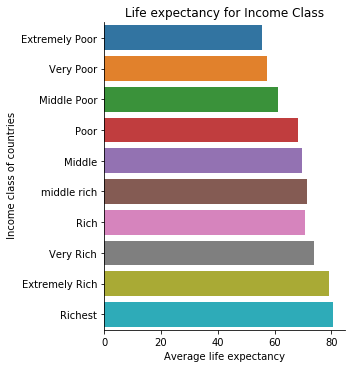

In [96]:
sns.catplot(x = 'lifeexpectancy', y = 'income_class',data = df, kind = 'bar' , ci = None, )
plt.xlabel('Average life expectancy')
plt.ylabel(' Income class of countries')
plt.title('Life expectancy for Income Class')

#### I thought perhaps life expentancy could show a lower average in the richest countries due to the above breast cancer table but it seems to be the richest the country is the more life expectancy, explained perhaps by higher medical care and services. 

## Creating scatterplots to show correlation between variables

### By looking into the above analysis I will create correlation scatterplots on the variables I found most correlated to income per person, Namely: Internet user rate,  polity score and electricity usage 

Text(0.5, 1.0, 'Scatterplot for the association between Internet User Rate for Income Per Person')

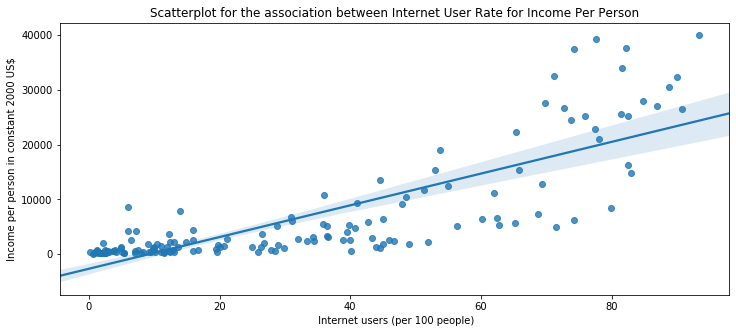

In [104]:
plt.figure(figsize=(12,5))
scat1 = sns.regplot(x = 'internetuserate', y = 'incomeperperson', data = df2)
plt.xlabel(' Internet users (per 100 people)')
plt.ylabel(' Income per person in constant 2000 US$ ')
plt.title('Scatterplot for the association between Internet User Rate for Income Per Person')


### With the above scatterplot we can see there is a correlation between internet usage and income per person, poorest countries are clustered with low values and the richest countries drive the line upwards with high numbers of income and internet usage. 

Text(0.5, 1.0, 'Scatterplot for the association between Democratic Score and Income Per Person')

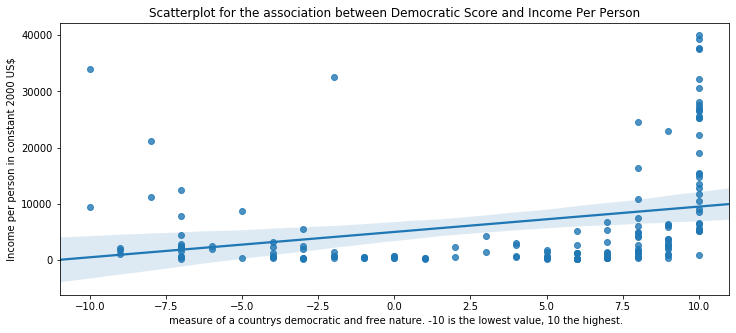

In [105]:
plt.figure(figsize=(12,5))
scat1 = sns.regplot(x = 'polityscore', y = 'incomeperperson', data = df2)
plt.xlabel(' measure of a countrys democratic and free nature. -10 is the lowest value, 10 the highest.')
plt.ylabel(' Income per person in constant 2000 US$ ')
plt.title('Scatterplot for the association between Democratic Score and Income Per Person')


### In this scatterplot we see the line is highly driven by the richest countries which share high democatric score driving the line upwards, however there are also some outliers in the low to mid range of the democratic score measures having high income but comparatively lower democratic score. 

Text(0.5, 1.0, 'Scatterplot for the association between Electricity consumption and Income Per Person')

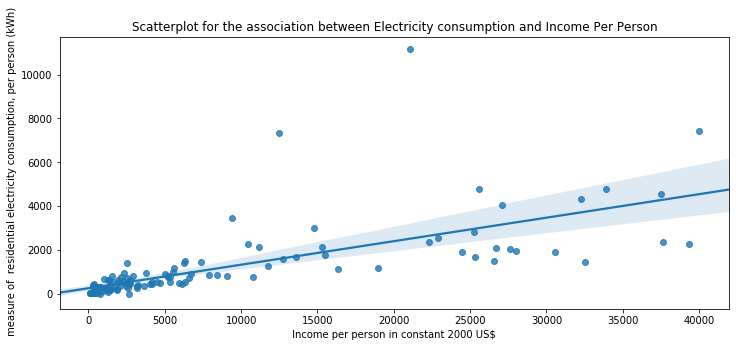

In [108]:
plt.figure(figsize=(12,5))
scat1 = sns.regplot(x = 'incomeperperson', y = 'relectricperperson', data = df2)
plt.xlabel(' Income per person in constant 2000 US$ ')
plt.ylabel(' measure of  residential electricity consumption, per person (kWh)')
plt.title('Scatterplot for the association between Electricity consumption and Income Per Person')



### Lastly in this scatterplot we see most countries, the poorest of them all are clustered in the low end of income per person and electricity usage and then the line is driven upwards by the richer countries as they scale. 

# conclusion. 

## To conclude this study I will answer the research questions put forward at the start of this analysis 

##### 1)does female employment rate, and general employment rate have a relation on Income per capita in richer countries and which have a greater effect on poorer countries. 

Female employment rate and general employment rate as evidenced by above chart had very little difference between the richest and poorest countries, as far as my analysis went considering more in dept anaysis would be necesary there is no direct relation between countries with more female employed or more employment rate and income per capita as the data is very evenly distributed. this means it is more the amount earned rather than the amount of people employed. 

this is evidenced also by the lack of correlation between this variables and income per person at -0.040390	and -0.017725 respectively. 

#### 2)to what extend Is internet user rate associated with richer countries in terms of income per capita?  
According to the above charts and analysis internet user rate has a considerably high correlation of 0.814343 with Income Per capita, explaining that the access to the internet has a great effect or rather is a big concequence of higher income countries. 

#### 3)Is electric consumption a determining factor in richer countries, how does it affect poorer countries
with a correlation of 0.696845 and evidenced by the above charts, electric consultion is a determining factor in riher countries. the effect on poorer countries would need to be further explored but with most poor countries clustered in the low end of electricity usage this lack of resource with inevitable hinder their ability to compete with richer countries. 


#### 4) to what extend does alcohol consumption affect income per capita? 
Interetingly enough there seems to be a higher alcohol consumption on richer countries than in poor countries and it is evidenced by a correlation of 0.288665. there is however more in dept studies required to understand the real effect it has on income per capita. whether it is a concequence of a more confortable and worry free lifestile or perhaps a factor of stress of the urban high paced life of rich countries. 